In [3]:
import random, json, os

import numpy as np
import pandas as pd

from logic import Game

import matplotlib.pyplot as plt
import matplotlib.animation as animation

%matplotlib notebook

In [4]:
class Agent(Game):
    
    def __init__(self, board_size=3):
        
        super().__init__(size=board_size)
        

    def run_episode(self):

        self.reset()
        state_list = []
        action_list = []

        i = 1
        done = False
        while not done:
            action = np.random.choice(self.get_valid_moves())
            done, tiles_made = self.step(action)
            
            state_list.append(np.squeeze(self.get_state(log=False)))
            action_list.append(action)
            
            i += 1

        return (self.score, self.highest_tile(), state_list, action_list)

              
    def evaluate_model(self, episodes):
        
        eval_dic = {'tile': [], 'score': []}
        
        for i in range(episodes):
            score, tile, state_list, action_list = self.run_episode()
            
            eval_dic['tile'].append(tile)
            eval_dic['score'].append(score)

        file_name = 'baseline_results.csv'
        
        df = pd.DataFrame.from_dict(eval_dic)
        df.to_csv(file_name)
        
        return eval_dic
        

    def create_plots(self):
        self.score_list = []
        self.score_figure = plt.figure()
        self.score_ax = self.score_figure.add_subplot(111)
        self.score_figure.show()
        self.score_figure.canvas.draw()
        
        self.tile_list = []
        self.tile_dic = {}
        self.tile_figure = plt.figure()
        self.tile_ax = self.tile_figure.add_subplot(111)
        self.tile_ax.legend()
        self.tile_figure.show()
        self.tile_figure.canvas.draw()
        
        self.weights_dic = {}
        self.weights_dic[0] = []
        self.weights_dic[1] = []
        self.weights_dic[-1] = []
        self.weights_figure = plt.figure()
        self.weights_ax = self.weights_figure.add_subplot(111)
        self.weights_figure.show()
        self.weights_figure.canvas.draw()
        
        self.biases_dic = {}
        self.biases_dic[0] = []
        self.biases_dic[1] = []
        self.biases_dic[-1] = []
        self.biases_figure = plt.figure()
        self.biases_ax = self.biases_figure.add_subplot(111)
        self.biases_figure.show()
        self.biases_figure.canvas.draw()
        
    
    def update_plots(self, tile, score):
        
        self.score_list.append(score)
        self.score_ax.clear()
        self.score_ax.plot(range(len(self.score_list)), self.score_list)
        self.score_figure.canvas.draw()
        
        self.tile_list.append(tile)
        for key in self.tile_dic.keys():
            if key != tile:
                self.tile_dic[key].append(self.tile_dic[key][-1]*.99)
        if tile in self.tile_dic.keys():
            self.tile_dic[tile].append(self.tile_dic[tile][-1]*.99 + 0.01)
        else:
            self.tile_dic[tile] = [0]*len(self.tile_list)
            self.tile_dic[tile][-1] = 0.01
        self.tile_ax.clear()
        for key in self.tile_dic.keys():
            self.tile_ax.plot(range(len(self.tile_list)), self.tile_dic[key], label=str(key))
        self.tile_ax.legend(loc='upper left')
        self.tile_figure.canvas.draw()
        
        tot_weights = None
        tot_biases = None
        for layer in [layer.get_weights() for layer in agent.model.layers]:
            if len(layer) > 0:
                weights, biases = layer
                if tot_weights is None:
                    tot_weights = weights.flatten()
                else:
                    tot_weights = np.concatenate((tot_weights, weights.flatten()))

                if tot_biases is None:
                    tot_biases = biases.flatten()
                else:
                    tot_biases = np.concatenate((tot_biases, biases.flatten()))
        
        weights_mean = np.mean(tot_weights)
        weights_std = np.std(tot_weights)
        biases_mean = np.mean(tot_biases)
        biases_std = np.std(tot_biases)
        
        self.weights_dic[0].append(weights_mean)
        self.weights_dic[1].append(weights_mean + weights_std)
        self.weights_dic[-1].append(weights_mean - weights_std)
        self.biases_dic[0].append(biases_mean)
        self.biases_dic[1].append(biases_mean + biases_std)
        self.biases_dic[-1].append(biases_mean - biases_std)
        
        self.weights_ax.clear()
        self.weights_ax.plot(range(len(self.weights_dic[0])), self.weights_dic[0])
        self.weights_ax.plot(range(len(self.weights_dic[1])), self.weights_dic[1])
        self.weights_ax.plot(range(len(self.weights_dic[-1])), self.weights_dic[-1])
        self.weights_figure.canvas.draw()
        
        self.biases_ax.clear()
        self.biases_ax.plot(range(len(self.biases_dic[0])), self.biases_dic[0])
        self.biases_ax.plot(range(len(self.biases_dic[1])), self.biases_dic[1])
        self.biases_ax.plot(range(len(self.biases_dic[-1])), self.biases_dic[-1])
        self.biases_figure.canvas.draw()

In [5]:
agent = Agent()

In [6]:
results = agent.evaluate_model(100)

In [7]:
# Convert highest tile to log scale
log_tile = [np.log2(tile) for tile in results['tile']]
print(2**np.min(log_tile))
print(2**np.max(log_tile))

8.0
64.0


<IPython.core.display.Javascript object>


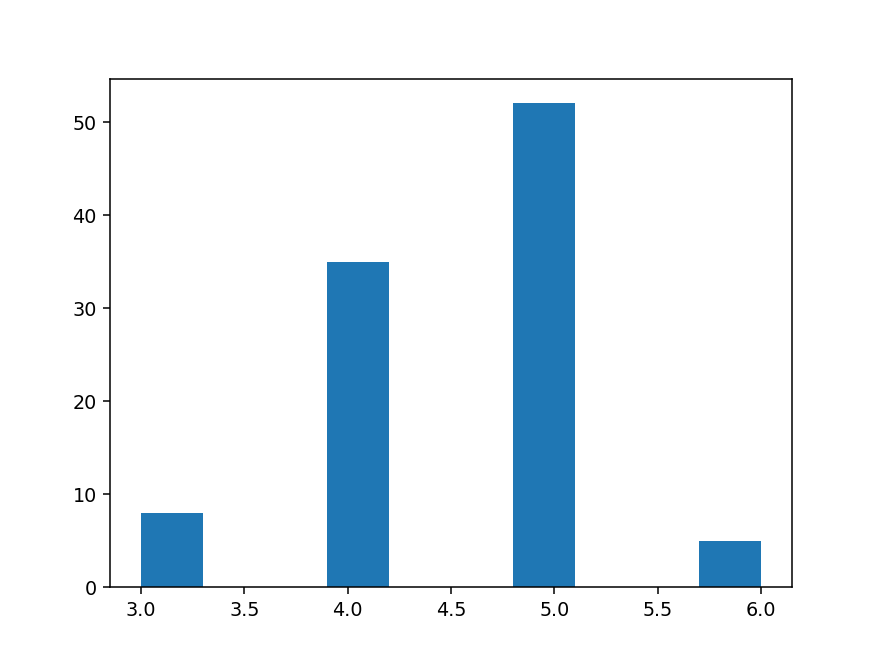

(array([ 8.,  0.,  0., 35.,  0.,  0., 52.,  0.,  0.,  5.]),
 array([3. , 3.3, 3.6, 3.9, 4.2, 4.5, 4.8, 5.1, 5.4, 5.7, 6. ]),
 <BarContainer object of 10 artists>)

In [8]:
plt.hist(log_tile)

In [32]:
plt.hist(log_tile)

(array([1.000e+00, 6.400e+01, 0.000e+00, 1.013e+03, 0.000e+00, 4.325e+03,
        4.098e+03, 0.000e+00, 4.980e+02, 1.000e+00]),
 array([3. , 3.6, 4.2, 4.8, 5.4, 6. , 6.6, 7.2, 7.8, 8.4, 9. ]),
 <BarContainer object of 10 artists>)